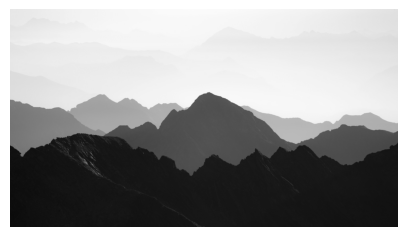

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Specify the path to your image
image_path = r'C:\Users\alvin\Downloads\IMG_0123.JPG'  # Replace with your actual file name

# 2. Read the image
img = mpimg.imread(image_path)

# 3. Display the image
plt.figure(figsize=(5, 5)) # Optional: Adjust size
plt.imshow(img)
plt.axis('off') # Optional: Removes the axis numbers
plt.show()

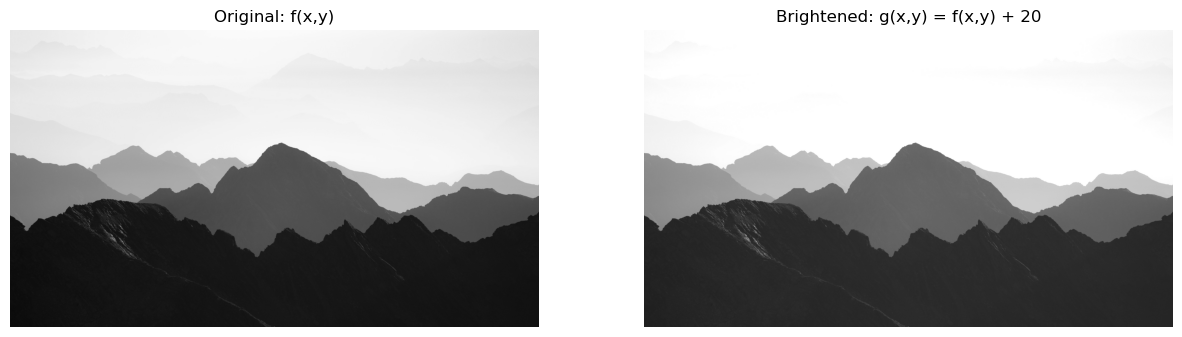

In [3]:

import numpy as np  # Imported to handle the math

# 1. Specify the path to your image
image_path = r'C:\Users\alvin\Downloads\IMG_0123.JPG'

# 2. Read the image
img = mpimg.imread(image_path)

# 3. Apply the brightness function: g(x,y) = f(x,y) + 20
# We assume the jpg is loaded as integers 0-255. 
# We convert to 'int16' so we can go above 255 temporarily without wrapping around.
bright_img = img.astype('int16') + 20

# 4. Clip values to ensure they stay between 0 and 255
# (e.g., if a pixel becomes 270, clip it back to 255 so it's just pure white)
bright_img = np.clip(bright_img, 0, 255)

# 5. Convert back to 'uint8' (standard image format) for display
bright_img = bright_img.astype('uint8')

# 6. Display the images
plt.figure(figsize=(15, 10))

# Original
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original: f(x,y)")
plt.axis('off')

# Brightened
plt.subplot(1, 2, 2)
plt.imshow(bright_img)
plt.title("Brightened: g(x,y) = f(x,y) + 20")
plt.axis('off')

plt.show()

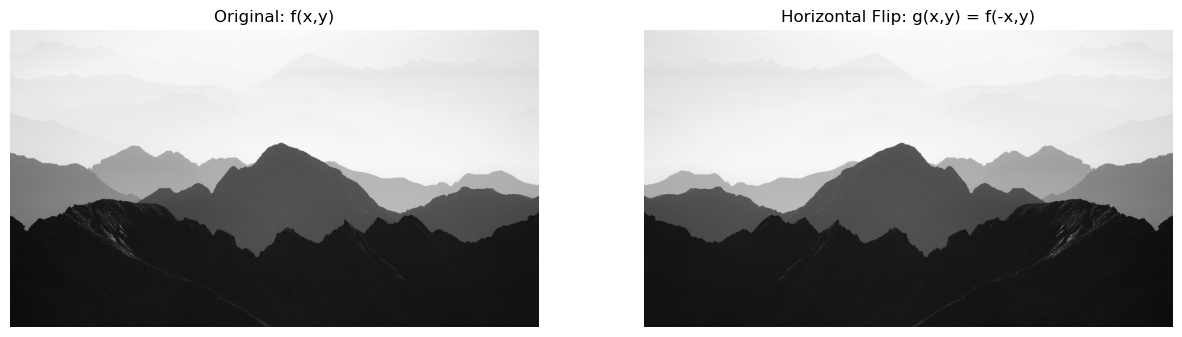

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 1. Specify the path to your image
image_path = r'C:\Users\alvin\Downloads\IMG_0123.JPG'

# 2. Read the image
img = mpimg.imread(image_path)

# 3. Apply the function: g(x,y) = f(-x,y)
# In NumPy, images are stored as [Height, Width, Channels] aka [y, x, c]
# syntax: img[start:stop:step]
# By using step -1 on the second dimension (x), we reverse the columns.
flipped_img = img[:, ::-1, :]

# 4. Display the images
plt.figure(figsize=(15, 10))

# Original
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original: f(x,y)")
plt.axis('off')

# Flipped
plt.subplot(1, 2, 2)
plt.imshow(flipped_img)
plt.title("Horizontal Flip: g(x,y) = f(-x,y)")
plt.axis('off')

plt.show()

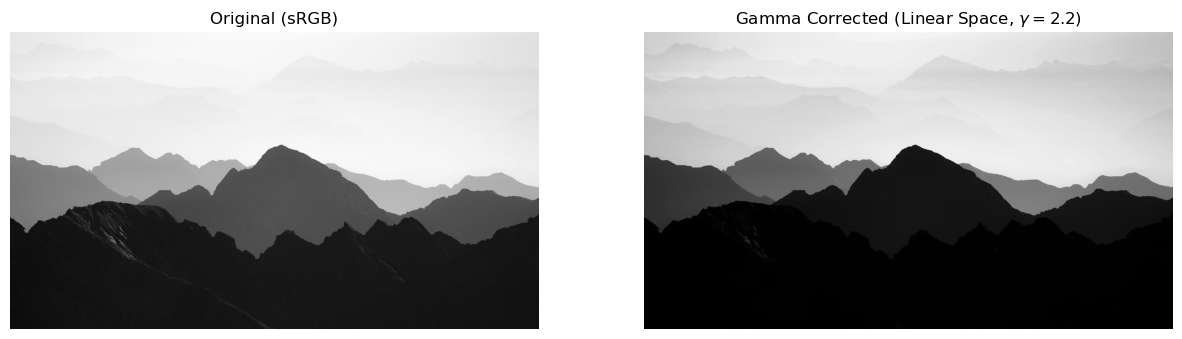

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 1. Specify the path (Use your specific path)
image_path = r'C:\Users\alvin\Downloads\IMG_0123.JPG' 

# 2. Read the image
img = mpimg.imread(image_path)

# 3. Define the Gamma Correction Function
def gamma_correction(image, gamma=2.2, A=1.0):
    # Normalize to [0, 1] range first if the image is 0-255 (integers)
    # Matplotlib's mpimg usually reads JPEGs as 0-255 uint8
    if image.dtype == 'uint8':
        image_norm = image / 255.0
    else:
        # If it's already float 0-1 (some pngs), use as is
        image_norm = image
        
    # Apply the formula: V_out = A * V_in ^ gamma
    img_corrected = A * (image_norm ** gamma)
    
    # Clip values to ensure they stay within [0, 1] to avoid display errors
    img_corrected = np.clip(img_corrected, 0, 1)
    
    return img_corrected

# 4. Apply the correction
# gamma=2.2 converts sRGB (standard monitor) to Linear Space (darker, math-ready)
# gamma=1/2.2 (approx 0.45) would brighten it (Linear to sRGB)
linear_image = gamma_correction(img, gamma=2.2)

# 5. Display Side-by-Side
plt.figure(figsize=(15, 10))

# Original
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original (sRGB)")
plt.axis('off')

# Corrected (Linearized)
plt.subplot(1, 2, 2)
plt.imshow(linear_image)
plt.title("Gamma Corrected (Linear Space, $\gamma=2.2$)")
plt.axis('off')

plt.show()

C:\Users\alvin\AppData\Local\Temp\ipykernel_7916\1732043874.py:61: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.flatten(), 256, [0,256], color = 'r')
C:\Users\alvin\AppData\Local\Temp\ipykernel_7916\1732043874.py:73: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ_opencv.flatten(), 256, [0,256], color = 'r')


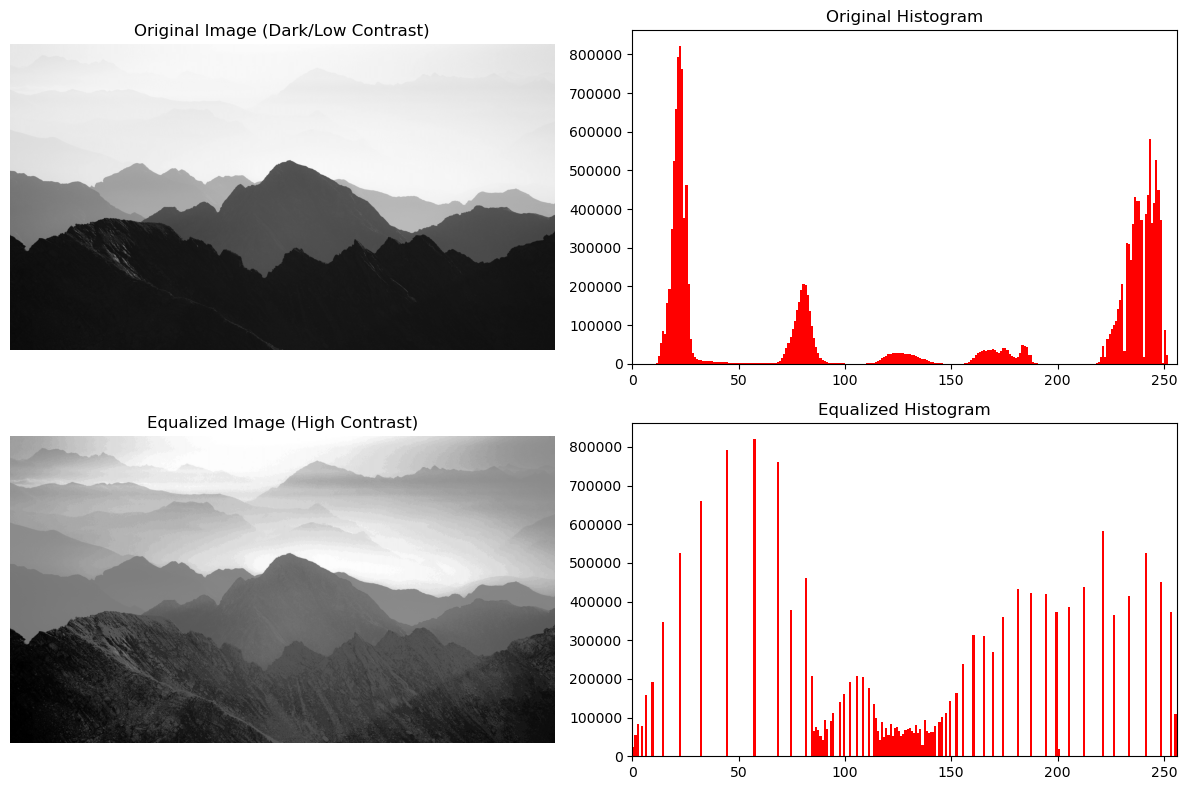

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image in Greyscale
# Replace 'your_dark_image.jpg' with your actual file path
# If you don't have an image, we can generate a random dark one for testing
img = cv2.imread(r'C:\Users\alvin\Downloads\IMG_0123.JPG', 0) 

# (Optional: Generate a dummy dark image if file not found)
if img is None:
    print("Image not found. Generating a dummy dark image...")
    img = np.random.randint(0, 100, (200, 200), dtype=np.uint8)

# ==========================================
# METHOD 1: The OpenCV Way (Fast & Easy)
# ==========================================
# This function calculates the histogram, computes the CDF, and maps the pixels
equ_opencv = cv2.equalizeHist(img)

# ==========================================
# METHOD 2: The "First Principles" Way (NumPy)
# ==========================================
# This is the manual math implementation of s = round( (L-1) * CDF(r) )

# Step A: Calculate the Histogram (frequency of each pixel value 0-255)
hist, bins = np.histogram(img.flatten(), 256, [0,256])

# Step B: Calculate the CDF (Cumulative Distribution Function)
cdf = hist.cumsum()

# Step C: Mask zeroes (ignoring 0 values prevents divide-by-zero errors if masking is needed, 
# but strictly for EQ, we just normalize)
cdf_normalized = cdf * float(hist.max()) / cdf.max() # Just for visualization later

# Step D: Apply the Equalization Formula
# s = (cdf - cdf_min) / (total_pixels - cdf_min) * 255
# Note: The masked array approach is often used to handle the 0 index correctly
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

# Step E: Map the original image pixels to new values using the calculated CDF
equ_numpy = cdf_final[img]

# ==========================================
# VISUALIZATION
# ==========================================
# Let's plot the Original vs. Equalized to see the contrast change

plt.figure(figsize=(12, 8))

# 1. Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image (Dark/Low Contrast)')
plt.axis('off')

# 2. Original Histogram
plt.subplot(2, 2, 2)
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.title('Original Histogram')
plt.xlim([0, 256])

# 3. Equalized Image (OpenCV Result)
plt.subplot(2, 2, 3)
plt.imshow(equ_opencv, cmap='gray')
plt.title('Equalized Image (High Contrast)')
plt.axis('off')

# 4. Equalized Histogram (The result should look more "spread out")
plt.subplot(2, 2, 4)
plt.hist(equ_opencv.flatten(), 256, [0,256], color = 'r')
plt.title('Equalized Histogram')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()